**[ DOKUMENTASI PYTHON DATASET 2 ]**
> Section Data Cleansing !\
> Date | 01 Oktober 2024 \
> Link Dataset : https://drive.google.com/file/d/1wHXrLeZnj_C2ABqxxCvm0Txtc__PzaAe/view?usp=sharing

Nama : MUH. ASHARI RASYID \
Class : Data Analyst 1 MIKTI \
Pemateri : Kak Fadhlan \
Biopage : Klik > [My Biopage](https://bio.asharirasyid.my.id)

# Test Data IMDB.csv

## 1.Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Buka Gdrive
from google.colab import drive
drive.mount('/content/drive')

# Import Data
df = pd.read_csv('/content/drive/MyDrive/MIKTI/Dataset/IMDB.csv')
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
95,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
96,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
97,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


## 2.Hilangkan Kolom gak di pakai



In [2]:
df2 = df.drop(['color', 'language'], axis=1, inplace=False)
df2


,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...
94,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
95,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
96,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
97,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


## 3.Info Data

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         88 non-null     object 
 1   duration              99 non-null     int64  
 2   gross                 91 non-null     float64
 3   genres                98 non-null     object 
 4   movie_title           99 non-null     object 
 5   title_year            99 non-null     int64  
 6   country               99 non-null     object 
 7   budget                95 non-null     float64
 8   imdb_score            99 non-null     float64
 9   actors                99 non-null     object 
 10  movie_facebook_likes  99 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 8.6+ KB


## 4.Info Statistic

In [4]:
df2.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,99.000000,9.100000e+01,99.000000,9.500000e+01,99.000000,99.000000
mean,155.494949,1.541914e+08,1976.444444,1.048570e+08,6.892929,66045.707071
std,72.797927,1.399503e+08,255.880601,7.703169e+07,1.925514,58108.860365
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.500000,4.720632e+07,2012.000000,4.000000e+07,6.550000,25000.000000
50%,143.000000,1.156040e+08,2013.000000,8.000000e+07,7.200000,54000.000000
75%,155.000000,2.374894e+08,2014.000000,1.740000e+08,7.850000,85500.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


## 5.Cek Data Kosong dimana saja

In [5]:
# Cek value yang kosong di semua kolom
missing_values = df2.isnull().sum()
missing_values_sum = df2.isnull().sum().sum()
print(missing_values)
print('Jumlah Kosong : ' + missing_values_sum.astype(str))
print('')

# Tampilkan index yang memiliki value kosong
for column in df2.columns:
  if df2[column].isnull().any():
    print(f"Kolom '{column}' memiliki nilai kosong pada index:")
    print(df2[df2[column].isnull()].index.tolist())


director_name           11
duration                 0
gross                    8
genres                   1
movie_title              0
title_year               0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64
Jumlah Kosong : 24

Kolom 'director_name' memiliki nilai kosong pada index:
[5, 24, 32, 41, 56, 59, 71, 75, 82, 84, 91]
Kolom 'gross' memiliki nilai kosong pada index:
[7, 27, 37, 56, 61, 62, 63, 92]
Kolom 'genres' memiliki nilai kosong pada index:
[12]
Kolom 'budget' memiliki nilai kosong pada index:
[7, 27, 33, 95]


## 6.Cek Array data di Kolom Director Name

In [6]:
df2['director_name'].unique()

array(['Martin Scorsese', 'Shane Black', 'Quentin Tarantino',
       'Kenneth Lonergan', 'Peter Jackson', nan, 'Edward Hall',
       'Joss Whedon', 'Tom Tykwer', 'Null', 'Christopher Spencer',
       'Christopher Nolan', 'F. Gary Gray', 'Richard Linklater',
       'Michael Bay', 'Tom Hooper', 'Kathryn Bigelow', 'Ridley Scott',
       'Denis Villeneuve', 'Gnana Rajasekaran', 'Marc Webb', 'Nan',
       'Mike Leigh', 'Gore Verbinski', 'David Fincher', 'Bryan Singer',
       'Jay Oliva', 'Paul Thomas Anderson', 'Sam Mendes',
       'Michael Patrick King', 'Tate Taylor', 'Francis Lawrence',
       'Steven Spielberg', 'Guillaume Canet', 'Adam McKay', 'Zack Snyder',
       'Baz Luhrmann', 'Timur Bekmambetov', 'Justin Chadwick',
       'Oliver Stone', 'David Dobkin', 'Ryan Murphy', 'James Wan',
       'Derek Cianfrance', "Gavin O'Connor", 'Gary Ross',
       'Terrence Malick', 'Robert Zemeckis', 'Darren Aronofsky',
       'James Mangold', 'Daniel Espinosa', 'Walter Salles',
       'Angelina Jo

### a.Ganti Teks Data Kosong menjadi String Kosong

In [7]:
df2['director_name'] = np.where(df2['director_name'] == 'Nan', '-', df2['director_name'])
df2['director_name'] = np.where(df2['director_name'] == 'Null', '-', df2['director_name'])
df2['director_name'] = np.where(df2['director_name'].isnull(), '-', df2['director_name'])
df2['director_name'].unique()

array(['Martin Scorsese', 'Shane Black', 'Quentin Tarantino',
       'Kenneth Lonergan', 'Peter Jackson', '-', 'Edward Hall',
       'Joss Whedon', 'Tom Tykwer', 'Christopher Spencer',
       'Christopher Nolan', 'F. Gary Gray', 'Richard Linklater',
       'Michael Bay', 'Tom Hooper', 'Kathryn Bigelow', 'Ridley Scott',
       'Denis Villeneuve', 'Gnana Rajasekaran', 'Marc Webb', 'Mike Leigh',
       'Gore Verbinski', 'David Fincher', 'Bryan Singer', 'Jay Oliva',
       'Paul Thomas Anderson', 'Sam Mendes', 'Michael Patrick King',
       'Tate Taylor', 'Francis Lawrence', 'Steven Spielberg',
       'Guillaume Canet', 'Adam McKay', 'Zack Snyder', 'Baz Luhrmann',
       'Timur Bekmambetov', 'Justin Chadwick', 'Oliver Stone',
       'David Dobkin', 'Ryan Murphy', 'James Wan', 'Derek Cianfrance',
       "Gavin O'Connor", 'Gary Ross', 'Terrence Malick',
       'Robert Zemeckis', 'Darren Aronofsky', 'James Mangold',
       'Daniel Espinosa', 'Walter Salles', 'Angelina Jolie Pitt',
       'Set

In [8]:
# Cek data kosong di Director Name
df2['director_name'].isnull().sum()

0

## 7.Plot Design Duration

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0f026c5a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0f026c50f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0f026c4070>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0f026c4460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0f026c4ca0>],
 'means': []}

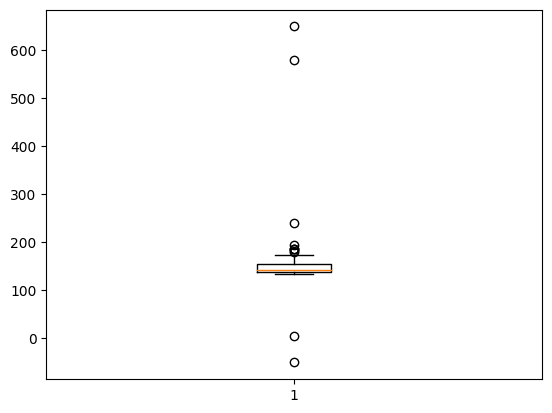

In [9]:
plt.boxplot(df2['duration'])

### a.Tampilkan Data Duration dan Hapus -50

In [10]:
df2['duration'].unique()

array([240, 195, 187, 186, 183, -50, 180, 173, 172, 158, 170, 169, 167,
       165, 580, 164, 157, 156, 154, 153, 151, 150, 650, 149, 148, 147,
       146, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134,   5])

In [11]:
df2 = df2[df2.duration != -50] #tidak ambil -50
df2['duration'].unique()

array([240, 195, 187, 186, 183, 180, 173, 172, 158, 170, 169, 167, 165,
       580, 164, 157, 156, 154, 153, 151, 150, 650, 149, 148, 147, 146,
       144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134,   5])

## 8.Hilangkan Data Kosong Gross

In [12]:
pd.set_option('display.max_rows', None)
df2['gross']

,gross
0,116866727.0
1,408992272.0
2,54116191.0
3,46495.0
4,258355354.0
5,330249062.0
7,NaN
8,623279547.0
9,623279547.0
10,27098580.0


In [13]:
df2['gross'].fillna(0, inplace=True)

pd.set_option('display.max_rows', None)
df2['gross']

<ipython-input-13-33ee5f66008f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gross'].fillna(0, inplace=True)


,gross
0,116866727.0
1,408992272.0
2,54116191.0
3,46495.0
4,258355354.0
5,330249062.0
7,0.0
8,623279547.0
9,623279547.0
10,27098580.0


In [14]:
# Cek Data Kosong
df2['gross'].isnull().sum()

0

## 9.Hilangkan data kosong Genres dan Budget

In [15]:
pd.set_option('display.max_rows', None)
df2[['genres', 'budget']]

,genres,budget
0,Biography|Comedy|Crime|Drama,100000000.0
1,Action|Adventure|Sci-Fi,200000000.0
2,Crime|Drama|Mystery|Thriller|Western,44000000.0
3,Drama,14000000.0
4,Adventure|Fantasy,225000000.0
5,Action|Adventure|Sci-Fi,250000000.0
7,Drama|Romance,NaN
8,Action|Adventure|Sci-Fi,220000000.0
9,Action|Adventure|Sci-Fi,220000000.0
10,Drama|Sci-Fi,102000000.0


In [16]:
df2['genres'].fillna('-', inplace=True)
df2['budget'].fillna(0, inplace=True)
df2['genres'] = df2['genres'].str.replace('|',',')

pd.set_option('display.max_rows', None)
df2[['genres', 'budget']]

<ipython-input-16-47efe8f96621>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['genres'].fillna('-', inplace=True)
<ipython-input-16-47efe8f96621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genres'].fillna('-', inplace=True)
<ipython-input-16-47efe8f96621>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame 

,genres,budget
0,"Biography,Comedy,Crime,Drama",100000000.0
1,"Action,Adventure,Sci-Fi",200000000.0
2,"Crime,Drama,Mystery,Thriller,Western",44000000.0
3,Drama,14000000.0
4,"Adventure,Fantasy",225000000.0
5,"Action,Adventure,Sci-Fi",250000000.0
7,"Drama,Romance",0.0
8,"Action,Adventure,Sci-Fi",220000000.0
9,"Action,Adventure,Sci-Fi",220000000.0
10,"Drama,Sci-Fi",102000000.0


## 10.Ubah data Years

In [17]:
df2['title_year'].unique()

array([2013, 2015, 2011,  202, 2012, 2014, 2010, 2016,  205])

In [18]:
df2['title_year'] = df2['title_year'].replace({202: 2002, 205: 2005})
df2['title_year']

<ipython-input-18-74faaf76729c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title_year'] = df2['title_year'].replace({202: 2002, 205: 2005})


,title_year
0,2013
1,2013
2,2015
3,2011
4,2013
5,2002
7,2012
8,2012
9,2012
10,2012


## 11.Ubah data IMDB Score



In [19]:
df2['imdb_score'].unique()

array([ 8.2,  7.2,  7.9,  6.5,  6.9,  8.1, -7.5,  7.8,  5.6,  8.6,  8. ,
        8.5,  5.7,  7.5,  7.6,  7.4,  6.7,  6.3,  7. ,  6.1,  6.8,  8.4,
        8.8,  4.3,  7.1,  7.3,  3. ,  6. ,  5.8,  5.3,  6.4,  6.6, -1.2,
        5.9,  8.7])

In [20]:
# prompt: ambil data tanpa -1.2

df2 = df2[df2.imdb_score != -1.2]
df2['imdb_score'].unique()


array([ 8.2,  7.2,  7.9,  6.5,  6.9,  8.1, -7.5,  7.8,  5.6,  8.6,  8. ,
        8.5,  5.7,  7.5,  7.6,  7.4,  6.7,  6.3,  7. ,  6.1,  6.8,  8.4,
        8.8,  4.3,  7.1,  7.3,  3. ,  6. ,  5.8,  5.3,  6.4,  6.6,  5.9,
        8.7])

## 12.Ubah data Country

In [21]:
df2['country'] = df2['country'].str.replace('usa', 'USA')
pd.set_option('display.max_rows', None)
df2['country']


<ipython-input-21-30a8cf243d4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['country'] = df2['country'].str.replace('usa', 'USA')


,country
0,USA
1,USA
2,USA
3,USA
4,USA
5,USA
7,UK
8,USA
9,USA
10,Germany


## 13.Hasil Data setelah di edit

In [22]:
pd.set_option('display.max_rows', None)
df2

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,"Biography,Comedy,Crime,Drama",The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,"Action,Adventure,Sci-Fi",Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,"Crime,Drama,Mystery,Thriller,Western",The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,"Adventure,Fantasy",The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,-,183,330249062.0,"Action,Adventure,Sci-Fi",Batman v Superman: Dawn of Justice,2002,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
7,Edward Hall,180,0.0,"Drama,Romance",Restless,2012,UK,0.0,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Joss Whedon,173,623279547.0,"Action,Adventure,Sci-Fi",The Avengers,2012,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Joss Whedon,173,623279547.0,"Action,Adventure,Sci-Fi",The Avengers,2012,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
10,Tom Tykwer,172,27098580.0,"Drama,Sci-Fi",Cloud Atlas,2012,Germany,102000000.0,-7.5,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000


# Ekspor Data


In [23]:
# Install library openpyxl for xlsx
!pip install openpyxl

from google.colab import files
df2.to_excel('IMDB_Clean.xlsx', index=False)
files.download('IMDB_Clean.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df2.to_excel('/content/drive/MyDrive/MIKTI/Dataset/IMDB_Clean.xlsx', index=False)